In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv(r"/home/zsj/code/CSE587-Project-UsedCarPricePrediction1/carinfo_after_pre_clean.csv")
df.head()

,Unnamed: 0,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
0,0,2015,Subaru,Outback Limited,16998,92000,25 city/32 hwy,Automatic,2.0,4S4BSANC4F3279791,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Silver,Black
1,1,2017,Subaru,Forester 2.5I,16998,79000,22 city/28 hwy,Manual 6 Speed,1.0,JF2SJAACXHG452398,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Silver,Gray
2,2,2020,Subaru,Impreza,18998,43000,28 city/36 hwy,Automatic,1.0,4S3GKAB64L3608865,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Black
3,3,2016,Subaru,Legacy 2.5I,14998,91000,26 city/36 hwy,Automatic,3.0,4S3BNAA63G3004121,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
4,4,2021,Subaru,Crosstrek Premium,24998,53000,28 city/33 hwy,Automatic,1.0,JF2GTAEC8MH670080,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Black


**Data Cleaning for attributes: Accident / Damage, make, mileage, price**

In [2]:
df.columns.tolist()

['Unnamed: 0',
 'year',
 'make',
 'model',
 'price',
 'mileage',
 'Miles per gallon',
 'Transmission',
 'owner',
 'VIN',
 'class',
 'Auction Brand / Issues',
 'Accident / Damage',
 'Open Recall Check',
 'Odometer Check',
 'Certified Pre-Owned',
 'cylinders',
 'fuel',
 'Drive type',
 'Miles per gallon equivalent (MPGe)',
 'Range (when new)',
 'Time to fully charge battery (240V)',
 'Motor',
 'Bed Length',
 'exterior_color',
 'interior_color']

In [3]:
df_dmg=df.dropna(subset=['mileage','year','make','price','Accident / Damage']) # drop rows with NaN values in mileage, price or make
df_dmg = df_dmg[df_dmg['price']!=0] # drop rows with price equals to 0

In [4]:
average_price_by_make = df_dmg.groupby('make')['price'].mean()
lowest_ten_makes = average_price_by_make.sort_values().head(10)
highest_ten_makes = average_price_by_make.sort_values(ascending=False).head(10)


In [5]:
lowest_ten_makes

make
Hyundai       19954.468672
Mitsubishi    20048.484252
Buick         20720.965368
Mini          21246.323276
Nissan        22001.951100
Volkswagen    22651.104938
Mazda         22927.378917
Kia           22931.190981
Subaru        23680.248148
Ford          24181.816742
Name: price, dtype: float64

In [6]:
highest_ten_makes

make
Porsche          45998.000000
Land             39102.956268
Lexus            35798.000000
Ram              35472.193548
Tesla            33868.689655
BMW              33732.042553
GMC              33113.137838
Mercedes-Benz    33012.598540
Cadillac         32194.835979
Volvo            32017.256684
Name: price, dtype: float64

In [7]:
df_dmg['make'].value_counts()

make
Toyota           547
Jeep             493
Chevrolet        474
Ford             442
Audi             429
Honda            420
Mercedes-Benz    411
Nissan           409
Hyundai          399
Cadillac         378
Kia              377
BMW              376
Volvo            374
GMC              370
Mazda            351
Infiniti         346
Land             343
Acura            331
Volkswagen       324
Chrysler         313
Ram              310
Subaru           270
Lincoln          257
Mitsubishi       254
Porsche          234
Mini             232
Tesla            232
Buick            231
Dodge            210
Jaguar           190
Lexus             15
Name: count, dtype: int64

In [8]:
Hyundai_data=df_dmg.loc[df_dmg['make'].isin(['Hyundai'])]
Cadillac_data=df_dmg.loc[df_dmg['make'].isin(['Cadillac'])]

# Question 8 (Phase 2):  For used cars with different makes, will the accident record affect the used cars’ price differently? (Shijie Zhou)

In [9]:
Hyundai_data=Hyundai_data[['mileage','year','price','Accident / Damage']]
Hyundai_data['Accident / Damage'] = np.where(Hyundai_data['Accident / Damage'] == 'No Issue', 0, 1)

Cadillac_data=Cadillac_data[['mileage','year','price','Accident / Damage']]
Cadillac_data['Accident / Damage'] = np.where(Cadillac_data['Accident / Damage'] == 'No Issue', 0, 1)

In [10]:
Cadillac_data

,mileage,year,price,Accident / Damage
2941,12000,2021,40998,0
2977,37000,2019,26998,0
3058,54000,2015,18998,0
3267,100000,2017,17998,0
3722,37000,2019,26998,0
...,...,...,...,...
9426,54000,2015,18998,0
9663,12000,2021,40998,0
9697,37000,2019,26998,0
9773,54000,2015,18998,0


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

Hyundai_data['brand'] = 'Hyundai'
Cadillac_data['brand'] = 'Cadillac'

Hyundai_data_no_accident = Hyundai_data[Hyundai_data['Accident / Damage'] == 0][['mileage', 'price', 'year', 'brand']]
Hyundai_data_with_accident = Hyundai_data[Hyundai_data['Accident / Damage'] == 1][['mileage', 'price', 'year', 'brand']]
Cadillac_data_no_accident = Cadillac_data[Cadillac_data['Accident / Damage'] == 0][['mileage', 'price', 'year', 'brand']]
Cadillac_data_with_accident = Cadillac_data[Cadillac_data['Accident / Damage'] == 0][['mileage', 'price', 'year', 'brand']]


Above we split the data of Hyundai and Cadillac brands by whether with accidents. 

We will conduct the unsupervised clustering using the `Gaussian Mixture Model` only `evaluating on two brands' no accident cars, but with different learnt model`.

(1) First, we will learn the `Gaussian Mixture Model` on combined `Hyundai and Cadillac no accident cars`, with attributes `'mileage', 'price', 'year'`.

In [12]:
combined_no_accident_data = pd.concat([Hyundai_data_no_accident, Cadillac_data_no_accident], axis=0)

X_both_no_accident = combined_no_accident_data[['mileage', 'price', 'year']]
y_both_no_accident = combined_no_accident_data['brand']

scaler = StandardScaler()
X_both_no_accident_scaled = scaler.fit_transform(X_both_no_accident)

gmm = GaussianMixture(n_components=2, random_state=0) 
gmm.fit(X_both_no_accident_scaled)


cluster_labels0 = gmm.predict(X_both_no_accident_scaled)

accuracy: 0.6262975778546713


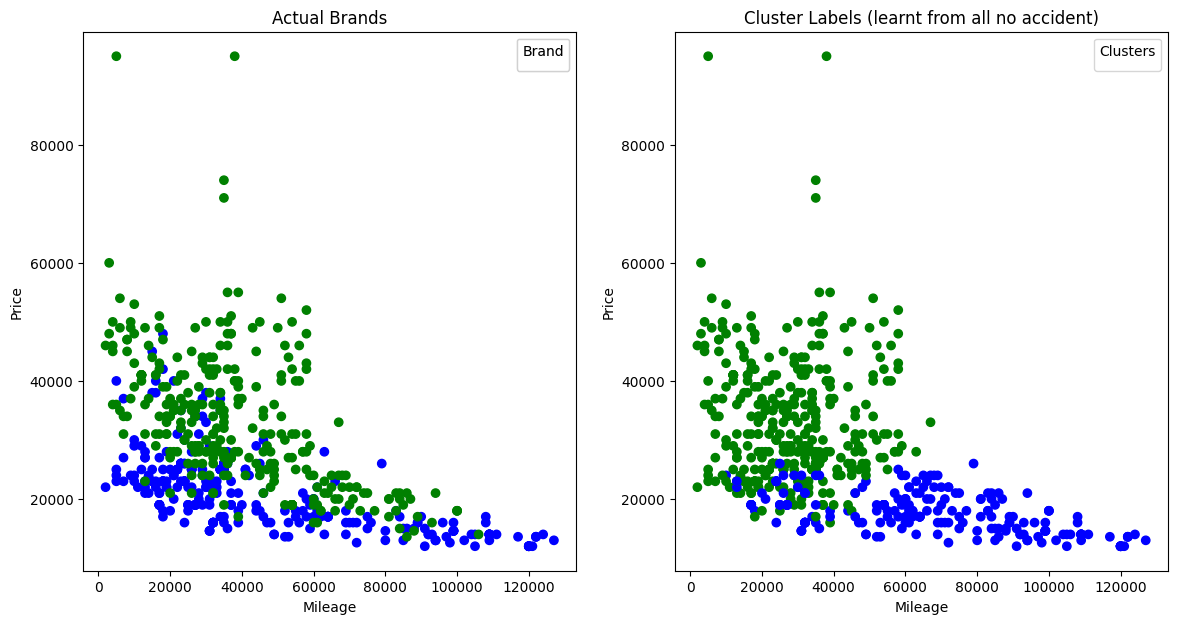

In [33]:
cluster_labels=cluster_labels0
y=y_both_no_accident
X=X_both_no_accident
print('accuracy:', max(sum(np.where(y == 'Hyundai', 0, 1)== cluster_labels)/len(y),sum(np.where(y == 'Hyundai', 1, 0)== cluster_labels)/len(y)))

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
brand_colors = {'Hyundai': 'blue', 'Cadillac': 'green'}
cluster_colors = ['blue', 'green'] 
scatter = axs[0].scatter(X['mileage'], X['price'], c=[brand_colors[br] for br in y], label=np.unique(y))
axs[0].set_title('Actual Brands')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Price')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Brand")
axs[0].add_artist(legend1)

scatter = axs[1].scatter(X['mileage'], X['price'], c=[cluster_colors[cl] for cl in cluster_labels], label=np.unique(cluster_labels))
axs[1].set_title('Cluster Labels (learnt from all no accident)')
axs[1].set_xlabel('Mileage')
axs[1].set_ylabel('Price')
legend2 = axs[1].legend(*scatter.legend_elements(), title="Clusters")

plt.show()



(2) Second, we will learn the `Gaussian Mixture Model` on combined `Hyundai all cars and Cadillac no accident cars`, with attributes `'mileage', 'price', 'year'`.

In [30]:
combined_Cadillac_no_accident_data = pd.concat([Hyundai_data_no_accident,Hyundai_data_with_accident, Cadillac_data_no_accident], axis=0)

X_Cadillac_no_accident_data = combined_Cadillac_no_accident_data[['mileage', 'price', 'year']]
y_Cadillac_no_accident_data = combined_Cadillac_no_accident_data['brand']

scaler = StandardScaler()
X_Cadillac_no_accident_data_scaled = scaler.fit_transform(X_Cadillac_no_accident_data)

gmm = GaussianMixture(n_components=2, random_state=0)  
gmm.fit(X_Cadillac_no_accident_data_scaled)


cluster_labels1 = gmm.predict(X_both_no_accident_scaled)

accuracy: 0.6505190311418685


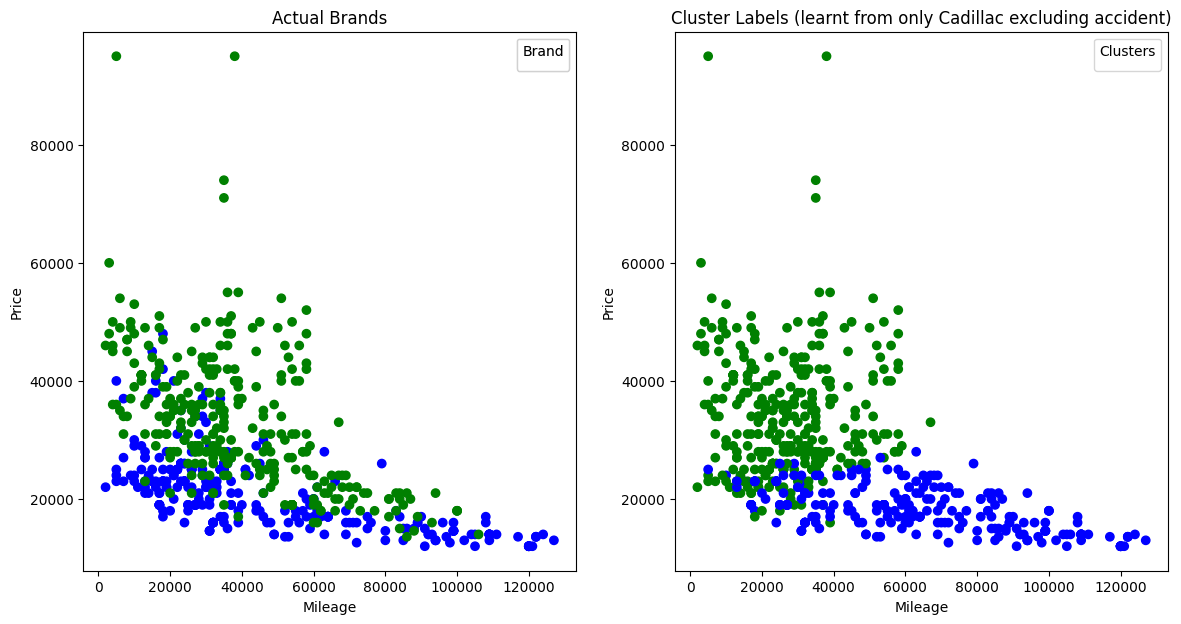

In [34]:
cluster_labels=cluster_labels1
y=y_both_no_accident
X=X_both_no_accident
print('accuracy:', max(sum(np.where(y == 'Hyundai', 0, 1)== cluster_labels)/len(y),sum(np.where(y == 'Hyundai', 1, 0)== cluster_labels)/len(y)))

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
brand_colors = {'Hyundai': 'blue', 'Cadillac': 'green'}
cluster_colors = ['green','blue'] 
scatter = axs[0].scatter(X['mileage'], X['price'], c=[brand_colors[br] for br in y], label=np.unique(y))
axs[0].set_title('Actual Brands')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Price')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Brand")
axs[0].add_artist(legend1)

scatter = axs[1].scatter(X['mileage'], X['price'], c=[cluster_colors[cl] for cl in cluster_labels], label=np.unique(cluster_labels))
axs[1].set_title('Cluster Labels (learnt from only Cadillac excluding accident)')
axs[1].set_xlabel('Mileage')
axs[1].set_ylabel('Price')
legend2 = axs[1].legend(*scatter.legend_elements(), title="Clusters")

plt.show()



(3) Third, we will learn the `Gaussian Mixture Model` on combined `Hyundai no accident cars and Cadillac all cars`, with attributes `'mileage', 'price', 'year'`.

In [35]:
combined_Hyundai_no_accident_data = pd.concat([Hyundai_data_no_accident,Cadillac_data_with_accident, Cadillac_data_no_accident], axis=0)

X_Hyundai_no_accident_data = combined_Hyundai_no_accident_data[['mileage', 'price', 'year']]
y_Hyundai_no_accident_data = combined_Hyundai_no_accident_data['brand']

scaler = StandardScaler()
X_Hyundai_no_accident_data_scaled = scaler.fit_transform(X_Hyundai_no_accident_data)

gmm = GaussianMixture(n_components=2, random_state=0)  
gmm.fit(X_Hyundai_no_accident_data_scaled)


cluster_labels2 = gmm.predict(X_both_no_accident_scaled)

accuracy: 0.6038062283737025


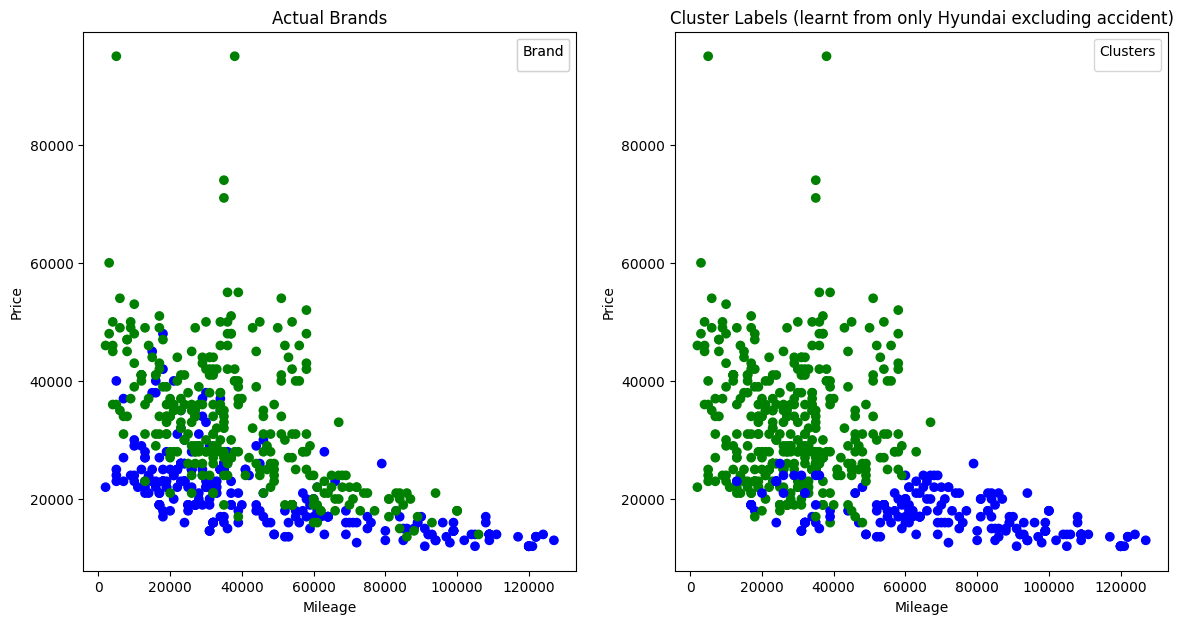

In [37]:
cluster_labels=cluster_labels2
y=y_both_no_accident
X=X_both_no_accident
print('accuracy:', max(sum(np.where(y == 'Hyundai', 0, 1)== cluster_labels)/len(y),sum(np.where(y == 'Hyundai', 1, 0)== cluster_labels)/len(y)))

fig, axs = plt.subplots(1, 2, figsize=(14, 7))
brand_colors = {'Hyundai': 'blue', 'Cadillac': 'green'}
cluster_colors = ['green','blue'] 
scatter = axs[0].scatter(X['mileage'], X['price'], c=[brand_colors[br] for br in y], label=np.unique(y))
axs[0].set_title('Actual Brands')
axs[0].set_xlabel('Mileage')
axs[0].set_ylabel('Price')
legend1 = axs[0].legend(*scatter.legend_elements(), title="Brand")
axs[0].add_artist(legend1)

scatter = axs[1].scatter(X['mileage'], X['price'], c=[cluster_colors[cl] for cl in cluster_labels], label=np.unique(cluster_labels))
axs[1].set_title('Cluster Labels (learnt from only Hyundai excluding accident)')
axs[1].set_xlabel('Mileage')
axs[1].set_ylabel('Price')
legend2 = axs[1].legend(*scatter.legend_elements(), title="Clusters")

plt.show()



## Analysis on (1) (2) (3)

Evaluating on no-accident Hyundai and Cadillac cars:

(1) The clustering accuracy using Gaussian Mixture Model learnt from `all no-accident cars` is 62.63%. 

(2) The clustering accuracy using Gaussian Mixture Model learnt from `all Hyundai cars and no-accident Cadillac cars` is 65.05%. 

(3) The clustering accuracy using Gaussian Mixture Model learnt from `no-accident Hyundai cars and all Cadillac cars` is 60.38%. 

Compared with (1), (2) increases 2.42%. It is because cars with accident usually has lower prices and Hyundai is the cheaper brand compared with Cadillac. Thus, extra adding Hyundai cars with accident into learning will enhance the clustering performance compared with (1). 

Compared with (1), (3) decreases 2.25%. It is because Cadillac is the more expensive brand compared with Hyundai and adding lower price Cadillac samples (with accident) will make the clustering boundary ambigious.



In [38]:
print(len(Cadillac_data_with_accident),len(Hyundai_data_with_accident))

299 120


2.42% is little larger than 2.25% which may indicates that the impacts of accidents on Hyundai is larger than the impacts of accidents on Cadillac.

But it is not enough. Considering the number of sample contrast between `Cadillac_data_with_accident` and `Hyundai_data_with_accident`: 299 vs. 120, but `Cadillac_data_with_accident` affect the Gaussian Mixture Model's performance less. 

We can thus conclude that Cadillac cars' price is more robust against the accident records and Hyundai cars' price is sensitive towards the accident although it is a cheap used car brand.

In [39]:
(2.42/120)/(2.25/299)

2.6799259259259256

We can approaximate the accident record affect Hyundai used cars' prices 2.68 times than the affects on Cadillac used cars' prices. 